### Projet final : Kit Big Data

In [61]:
# importation des bibliothèques, libairies et modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
import tempfile
from zipfile import ZipFile
import shutil
import os
from fnmatch import fnmatch
import sys
import csv
import glob
import re

import requests
from bs4 import BeautifulSoup
import openpyxl 
from openpyxl import Workbook

Le projet qui suit a pour but l'analyse de l'épreuve du VendéeGlobe 2020. Les données sont disponibles à travers 2 liens internet : nous avons d'un côté des fichiers excels 703 fichiers excels correspondant aux classements quotidiens des skippers tout au long de l'épreuve, et de l'autre côté nous avons les caractéristiques des skippers et de leurs voiliers qui sont recensés sur une page web du site du VendéeGlobe. L'objectif est dans un premier temps d'importer les données, pour cela nous téléchargerons manuellement les fichiers excels sur notre ordinateur, puis nous les importerons via une procédure pandas. Nous réaliserons ensuite un étape de web scrapping à travers laquelle nous importerons les données des caractéristiques des skippers à partir du site web où ils se trouvent. Nous procèderont ensuite à une étape de nettoyage des données sur chacun des 2 dataframes générés, puis nous réaliseront une jointure des 2 tables.

Par la suite nous réaliserons une étape d'analyse descriptives de nos données, puis une étape d'analyse, et enfin nous finiront avec une étape de visualisation des distances parcourues.

## 1. Importation des données

### 1.1 Importation des classements

#### 1.1.1 Importation des fichiers excels

In [78]:
# On ne prend que les fichiers excels des classements avant les arrivées

path = r'/Users/andressoto/Kit-Start-Data/Kit-Start-Data/data'
files = glob.glob(path + "/*.xlsx")
files.sort()

df = pd.DataFrame()
#files = glob.glob('/Users/andressoto/Kit-Start-Data/Kit-Start-Data/data/*.xslx')
for i in files :
    excel = pd.read_excel(i, header=0, names = ['Rang', 'Nat./Voile', 'Skipper/Bateau','Heure','Latitude','Longitude','Cap','Vitesse',
                        'VMG','Distance','Cap2','Vitesse2','VMG2','Distance2','Cap3','Vitesse3','VMG3','Distance3',
                        'DTF','DTL'], usecols="B:U", skiprows=4, skipfooter=4, sheet_name="fr", engine="openpyxl")
    df = df.append(excel, ignore_index=True)
df.head(50)

,Rang,Nat./Voile,Skipper/Bateau,Heure,Latitude,Longitude,Cap,Vitesse,VMG,Distance,Cap2,Vitesse2,VMG2,Distance2,Cap3,Vitesse3,VMG3,Distance3,DTF,DTL
0,1,\nFRA 18,Louis Burton\nBureau Vallée 2,15:30 FR\n,46°24.46'N,01°50.48'W,241°,17.7 kts,17.5 kts,0.3 nm,357°,0.0 kts,0.0 kts,2788.0 nm,201°,0.3 kts,0.3 kts,6.1 nm,24293.9 nm,0.0 nm
1,2,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,15:31 FR\n1min,46°24.34'N,01°49.82'W,241°,11.1 kts,10.9 kts,0.4 nm,357°,0.0 kts,0.0 kts,2787.9 nm,196°,0.3 kts,0.2 kts,6.0 nm,24294.2 nm,0.4 nm
2,3,\nFRA 8,Jérémie Beyou\nCharal,15:30 FR\n,46°24.91'N,01°49.99'W,244°,15.5 kts,15.5 kts,0.5 nm,357°,0.0 kts,0.0 kts,2788.5 nm,199°,0.2 kts,0.2 kts,5.5 nm,24294.3 nm,0.5 nm
3,4,\nFRA 59,Thomas Ruyant\nLinkedOut,15:30 FR\n,46°24.71'N,01°49.68'W,244°,13.2 kts,13.1 kts,0.7 nm,357°,0.0 kts,0.0 kts,2788.3 nm,196°,0.2 kts,0.2 kts,5.6 nm,24294.5 nm,0.6 nm
4,5,\nFRA 53,Maxime Sorel\nV And B Mayenne,15:30 FR\n,46°24.59'N,01°49.56'W,246°,10.9 kts,10.9 kts,0.2 nm,357°,0.0 kts,0.0 kts,2788.1 nm,195°,0.8 kts,0.7 kts,5.8 nm,24294.5 nm,0.6 nm
5,6,\nFRA 56,Fabrice Amedeo\nNewrest - Art et Fenetres,15:31 FR\n1min,46°25.19'N,01°49.87'W,238°,16.9 kts,16.9 kts,0.6 nm,357°,0.0 kts,0.0 kts,2788.7 nm,200°,0.2 kts,0.2 kts,5.3 nm,24294.5 nm,0.7 nm
6,7,\nFRA 01,Jean Le Cam\nYes we Cam !,15:30 FR\n,46°24.90'N,01°49.49'W,247°,10.7 kts,10.7 kts,0.2 nm,357°,0.0 kts,0.0 kts,2788.4 nm,196°,0.2 kts,0.2 kts,5.5 nm,24294.7 nm,0.8 nm
7,8,\nGBR 99,Alex Thomson\nHugo Boss,15:30 FR\n,46°25.21'N,01°49.45'W,238°,13.8 kts,13.7 kts,1.1 nm,357°,0.0 kts,0.0 kts,2788.7 nm,196°,0.2 kts,0.2 kts,5.2 nm,24294.8 nm,1.0 nm
8,9,FR\nFRA 69,Sébastien Destremau\nMerci,15:31 FR\n1min,46°25.04'N,01°49.32'W,245°,9.6 kts,9.6 kts,0.3 nm,357°,0.0 kts,0.0 kts,2788.6 nm,195°,0.2 kts,0.2 kts,5.3 nm,24294.8 nm,1.0 nm
9,10,\nGBR 777,Pip Hare\nMedallia,15:31 FR\n1min,46°25.22'N,01°49.36'W,245°,12.7 kts,12.7 kts,0.4 nm,357°,0.0 kts,0.0 kts,2788.8 nm,196°,0.2 kts,0.2 kts,5.1 nm,24294.9 nm,1.0 nm


In [4]:
# information sur les variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15840 entries, 0 to 15839
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rang            15840 non-null  object
 1   Nat./Voile      15840 non-null  object
 2   Skipper/Bateau  15840 non-null  object
 3   Heure           13638 non-null  object
 4   Latitude        13638 non-null  object
 5   Longitude       13638 non-null  object
 6   Cap             13638 non-null  object
 7   Vitesse         13638 non-null  object
 8   VMG             13638 non-null  object
 9   Distance        13638 non-null  object
 10  Cap2            13638 non-null  object
 11  Vitesse2        13638 non-null  object
 12  VMG2            13638 non-null  object
 13  Distance2       13638 non-null  object
 14  Cap3            13638 non-null  object
 15  Vitesse3        13638 non-null  object
 16  VMG3            13638 non-null  object
 17  Distance3       13638 non-null  object
 18  DTF   

#### 1.1.2 Nettoyage du dataframe

In [6]:
# Visualisation des valeurs manquantes par variables
VarContexte=df[['Rang', 'Nat./Voile', 'Skipper/Bateau','Heure','Latitude','Longitude','Cap','Vitesse',
                        'VMG','Distance','Cap2','Vitesse2','VMG2','Distance2','Cap3','Vitesse3','VMG3','Distance3',
                        'DTF','DTL']]
info_types = pd.DataFrame(VarContexte.dtypes)

df2 = pd.DataFrame()
var = info_types.index.tolist() #[info_types[0]!="object"]
nb_nan = VarContexte[var].apply(lambda x: x.isnull().sum()).values.tolist()
nb_distincts = VarContexte[var].apply(lambda x: x.nunique()).values.tolist()

df2 ["variables"] = var
df2["Nb value distinct"] = nb_distincts
df2["Nb value missing"] = nb_nan 
df2["%Modalité_missing"] = round((df2["Nb value missing"]/len(df))*100, 2)

print(df2.sort_values(by = '%Modalité_missing', ascending = False))

         variables  Nb value distinct  Nb value missing  %Modalité_missing
10            Cap2                351              2202               13.9
11        Vitesse2                229              2202               13.9
18             DTF              13161              2202               13.9
17       Distance3               3492              2202               13.9
16            VMG3                246              2202               13.9
15        Vitesse3                210              2202               13.9
14            Cap3                318              2202               13.9
13       Distance2               1305              2202               13.9
12            VMG2                277              2202               13.9
19             DTL              10609              2202               13.9
9         Distance                140              2202               13.9
8              VMG                298              2202               13.9
7          Vitesse       

On constate que les valeurs manquantes concernent toutes les mêmes lignes dans le dataframe.

Nous décidons de supprimer les lignes contenant des valeurs manquantes, car elles concernent les skippers qui ont abandonnés la course et donc pour lesquels on a aucune information sur leurs courses.

In [79]:
# suppression des lignes contenant des NaN
df = df.dropna()

In [80]:
# réinitialisation des index du dataframe
df.reset_index(inplace = True)

In [81]:
# vérification de présence de doublons
df.duplicated().sum() 

0

In [82]:
df.shape

(13638, 21)

#### Réécriture de certaines variables 

In [83]:
# fonctions pour retirer le/les derniers éléments d'une variable
def f1(x):
    a = []
    for i in x : 
        i=i[:-1]
        a.append(i)
    return a

def f3(x):
    a = []
    for i in x : 
        i=i[:-3]
        a.append(i)
    return a

def f4(x):
    a = []
    for i in x : 
        i=i[:-4]
        a.append(i)
    return a

def f5(x):
    a = []
    for i in x : 
        i=i[:-5]
        a.append(i)
    return a

# fonction pour retirer le premier élément d'une variable
def f11(x):
    a = []
    for i in x : 
        i=i[1:]
        a.append(i)
    return a

# fonction pour ne garder que les 5 premiers éléments d'une variable
def f55(x):
    a = []
    for i in x : 
        i=i[:5]
        a.append(i)
    return a

# fonction pour ne récupérer que les 3 premiers éléments d'une variable
def f33(x):
    a = []
    for i in x : 
        i=i[:3]
        a.append(i)
    return a

# fonction pour ne garder que les 2 derniers éléments d'une variable
def f2(x):
    a = []
    for i in x : 
        i=i[-2:]
        a.append(i)
    return a

# fonction pour récupérer le deuxième élément après un split
def function(x):
    a=[]
    for i in range(len(x)):
        a.append(df["Nat./Voile"][i].split(" ",1)[1])
    return a

# fonctions pour récupérer les éléments de la variable Nat.Voile
def function2(x):
    a=[]
    for i in range(len(x)):
        a.append(x[i].split("\n",1)[0])
    return a

def function3(x):
    a=[]
    for i in range(len(x)):
        a.append(x[i].split("\n",1)[1])
    return a

In [84]:
# Réécriture des variables 


# création de 2 nouvelles variables à partir de Nat./Voile : Nationalite & Voile
df['Nat./Voile'] = df['Nat./Voile'].astype('str')
df['Nat./Voile']=f11(df['Nat./Voile'])
df['Nat./Voile'] = df['Nat./Voile'].str.replace('R\n', '')

df["Nationalite"] = f33(df["Nat./Voile"])
df["Voile"] = function(df['Nat./Voile'])
df = df.drop('Nat./Voile', 1)

# création de 2 nouvelles variables Skipper/Bateau : Skipper et Bateau
df['Skipper/Bateau'] = df['Skipper/Bateau'].astype('str')
df["Skipper"] = function2(df['Skipper/Bateau'])
df["Bateau"] = function3(df['Skipper/Bateau'])
df = df.drop('Skipper/Bateau', 1)

# Heure
df["Heure"] = f55(df["Heure"])

# Cap
df["Cap"]=f1(df["Cap"])
df["Cap2"]=f1(df["Cap2"])
df["Cap3"]=f1(df["Cap3"])

# Vitesse
df["Vitesse"] = f4(df["Vitesse"])
df["Vitesse2"] = f4(df["Vitesse2"])
df["Vitesse3"] = f4(df["Vitesse3"])

# VMG
df["VMG"] = f4(df["VMG"])
df["VMG2"] = f4(df["VMG2"])
df["VMG3"] = f4(df["VMG3"])

# Distance
df["Distance"] = f3(df["Distance"])
df["Distance2"] = f3(df["Distance2"])
df["Distance3"] = f3(df["Distance3"])

# DTF
df["DTF"] = f3(df["DTF"])

# DTL
df["DTL"] = f3(df["DTL"])

Après avoir comparé les données des variables relatives aux skippers avec les données issues du deuxième lien contenant les caractéristiques des skippers, nous décidons de corriger 2 des valeurs concernant les numéros de voile de 2 skippers.

In [85]:
# correction de valeurs 
df["Voile"][df["Voile"] == '10'] = 16
df["Voile"][df["Voile"] == '777'] = 77

<ipython-input-85-2485ba85844f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Voile"][df["Voile"] == '10'] = 16
<ipython-input-85-2485ba85844f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Voile"][df["Voile"] == '777'] = 77


In [86]:
df.head()

,index,Rang,Heure,Latitude,Longitude,Cap,Vitesse,VMG,Distance,Cap2,...,Cap3,Vitesse3,VMG3,Distance3,DTF,DTL,Nationalite,Voile,Skipper,Bateau
0,0,1,15:30,46°24.46'N,01°50.48'W,241,17.7,17.5,0.3,357,...,201,0.3,0.3,6.1,24293.9,0.0,FRA,18,Louis Burton,Bureau Vallée 2
1,1,2,15:31,46°24.34'N,01°49.82'W,241,11.1,10.9,0.4,357,...,196,0.3,0.2,6.0,24294.2,0.4,MON,16,Boris Herrmann,Seaexplorer - Yacht Club De Monaco
2,2,3,15:30,46°24.91'N,01°49.99'W,244,15.5,15.5,0.5,357,...,199,0.2,0.2,5.5,24294.3,0.5,FRA,8,Jérémie Beyou,Charal
3,3,4,15:30,46°24.71'N,01°49.68'W,244,13.2,13.1,0.7,357,...,196,0.2,0.2,5.6,24294.5,0.6,FRA,59,Thomas Ruyant,LinkedOut
4,4,5,15:30,46°24.59'N,01°49.56'W,246,10.9,10.9,0.2,357,...,195,0.8,0.7,5.8,24294.5,0.6,FRA,53,Maxime Sorel,V And B Mayenne


##### Conversion des données de latitude et longétude en coordonnées décimales afin de pouvoir mieux les exploiter par la suite.

In [87]:
# fonction pour la conversion des coordonnées GPS en coordonnées décimales de lattitude et longitude
def conversion(old):
    direction = {'N':1, 'S':-1, 'E': 1, 'W':-1}
    new = str(old).replace('°',' ').replace('.',' ').replace('\'',' ')
    new = new.split()
    new_dir = new.pop()
    new.extend([0,0])
    return (int(new[0])+int(new[1])/60.0+int(new[2])/3600.0) * direction[new_dir]

In [88]:
# on écrase les données par les nouvelles coordonnées calculées 
a=[]
b=[]
for i in range(len(df["Latitude"])):
    i = conversion(df["Latitude"][i])
    a.append(i)

for j in range(len(df["Longitude"])):
    j = conversion(df["Longitude"][j])
    b.append(j)

df["Latitude"] = a 
df["Longitude"] = b

In [89]:
df.head()

,index,Rang,Heure,Latitude,Longitude,Cap,Vitesse,VMG,Distance,Cap2,...,Cap3,Vitesse3,VMG3,Distance3,DTF,DTL,Nationalite,Voile,Skipper,Bateau
0,0,1,15:30,46.412778,-1.846667,241,17.7,17.5,0.3,357,...,201,0.3,0.3,6.1,24293.9,0.0,FRA,18,Louis Burton,Bureau Vallée 2
1,1,2,15:31,46.409444,-1.839444,241,11.1,10.9,0.4,357,...,196,0.3,0.2,6.0,24294.2,0.4,MON,16,Boris Herrmann,Seaexplorer - Yacht Club De Monaco
2,2,3,15:30,46.425278,-1.844167,244,15.5,15.5,0.5,357,...,199,0.2,0.2,5.5,24294.3,0.5,FRA,8,Jérémie Beyou,Charal
3,3,4,15:30,46.419722,-1.835556,244,13.2,13.1,0.7,357,...,196,0.2,0.2,5.6,24294.5,0.6,FRA,59,Thomas Ruyant,LinkedOut
4,4,5,15:30,46.416389,-1.832222,246,10.9,10.9,0.2,357,...,195,0.8,0.7,5.8,24294.5,0.6,FRA,53,Maxime Sorel,V And B Mayenne


##### Changement de formats des variables

In [90]:
# Changement des formats des variables

# format objet to int
df['Rang'] = df['Rang'].astype(int)
df['Cap'] = df['Cap'].astype(int)
df['Cap2'] = df['Cap2'].astype(int)
df['Cap3'] = df['Cap3'].astype(int)
df['Voile'] = df['Voile'].astype(int)

# format objet to float
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
df['Vitesse'] = df['Vitesse'].astype(float)
df['Vitesse2'] = df['Vitesse2'].astype(float)
df['Vitesse3'] = df['Vitesse3'].astype(float)
df['VMG'] = df['VMG'].astype(float)
df['VMG2'] = df['VMG2'].astype(float)
df['VMG3'] = df['VMG3'].astype(float)
df['Distance'] = df['Distance'].astype(float)
df['Distance2'] = df['Distance2'].astype(float)
df['Distance3'] = df['Distance3'].astype(float)
df['DTF'] = df['DTF'].astype(float)
df['DTL'] = df['DTL'].astype(float)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13638 entries, 0 to 13637
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        13638 non-null  int64  
 1   Rang         13638 non-null  int64  
 2   Heure        13638 non-null  object 
 3   Latitude     13638 non-null  float64
 4   Longitude    13638 non-null  float64
 5   Cap          13638 non-null  int64  
 6   Vitesse      13638 non-null  float64
 7   VMG          13638 non-null  float64
 8   Distance     13638 non-null  float64
 9   Cap2         13638 non-null  int64  
 10  Vitesse2     13638 non-null  float64
 11  VMG2         13638 non-null  float64
 12  Distance2    13638 non-null  float64
 13  Cap3         13638 non-null  int64  
 14  Vitesse3     13638 non-null  float64
 15  VMG3         13638 non-null  float64
 16  Distance3    13638 non-null  float64
 17  DTF          13638 non-null  float64
 18  DTL          13638 non-null  float64
 19  Nati

##### Conversion de certains ordres de grandeurs

On constate que certaines variables numériques ont des ordres de grandeurs très spécifiques aux domaines de la voile mais beaucoup moins parlante pour nous, on décide donc de convertir certains ordre de grandeurs afin de rendre par la suite l'analyse beaucoup plus parlante de notre point de vue.

In [92]:
# conversion de l'ordre de grandeur des variables vitesse (noeuds) en kilomètres par heures (km/h)
df["Vitesse"]  = df["Vitesse"]*1.852
df["Vitesse2"] = df["Vitesse2"]*1.852
df["Vitesse3"] = df["Vitesse3"]*1.852

# conversion de l'ordre de grandeur des variables VMG (noeuds) en kilomètres par heures (km/h)
df["VMG"]  = df["VMG"]*1.852
df["VMG2"]  = df["VMG2"]*1.852
df["VMG3"]  = df["VMG3"]*1.852

# conversion de l'ordre de grandeur des variables distances (nm) en kilomètres (km)
df["Distance"]  = df["Distance"]*1.852
df["Distance2"]  = df["Distance2"]*1.852
df["Distance3"]  = df["Distance3"]*1.852

# conversion de l'ordre de grandeur de la variable DTF (nm) en kilomètres (km)
df["DTF"]  = df["DTF"]*1.852

# conversion de l'ordre de grandeur de la variable DTL (nm) en kilomètres (km)
df["DTL"]  = df["DTL"]*1.852

In [93]:
# suppresion de la variable index
df = df.drop('index', 1)

In [94]:
df.head()

,Rang,Heure,Latitude,Longitude,Cap,Vitesse,VMG,Distance,Cap2,Vitesse2,...,Cap3,Vitesse3,VMG3,Distance3,DTF,DTL,Nationalite,Voile,Skipper,Bateau
0,1,15:30,46.412778,-1.846667,241,32.7804,32.4100,0.5556,357,0.0,...,201,0.5556,0.5556,11.2972,44992.3028,0.0000,FRA,18,Louis Burton,Bureau Vallée 2
1,2,15:31,46.409444,-1.839444,241,20.5572,20.1868,0.7408,357,0.0,...,196,0.5556,0.3704,11.1120,44992.8584,0.7408,MON,16,Boris Herrmann,Seaexplorer - Yacht Club De Monaco
2,3,15:30,46.425278,-1.844167,244,28.7060,28.7060,0.9260,357,0.0,...,199,0.3704,0.3704,10.1860,44993.0436,0.9260,FRA,8,Jérémie Beyou,Charal
3,4,15:30,46.419722,-1.835556,244,24.4464,24.2612,1.2964,357,0.0,...,196,0.3704,0.3704,10.3712,44993.4140,1.1112,FRA,59,Thomas Ruyant,LinkedOut
4,5,15:30,46.416389,-1.832222,246,20.1868,20.1868,0.3704,357,0.0,...,195,1.4816,1.2964,10.7416,44993.4140,1.1112,FRA,53,Maxime Sorel,V And B Mayenne


### 1.2 Importation des caractéristiques des skippers

#### 1.2.1 Web scrapping

In [357]:
# Web Scarpping
url1 = "https://www.vendeeglobe.org/fr/glossaire"

def caracteristique(url):
    df2 = {}
    page = requests.get(url1)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    class1 = soup.find_all(class_="boats-list__skipper-name") # récupération des noms des skippers
    class2 = soup.find_all(class_="boats-list__popup-specs-list") # récupérations des caractéristiques
    
    Skipper = []
    Num_voile = []
    Anciens_noms_bateau = []
    Architecte = []
    Chantier = []
    Date_lancement = []
    Longueur = []
    Largeur = []
    Tirant_eau = []
    Deplacement_poids = []
    Nb_derives = []
    Hauteur_mat = []
    Voile_quille = []
    Surface_voile_pres = []
    Surface_voile_portant = []
    
    for i in class1:
        Skipper.append(i.text.split(" ")[0] + " " + i.text.split(" ")[1].capitalize())
        
    for j in class2:
        if "Numéro" in j.text: # condition pour contourner les valeurs manquantes 
            Num_voile.append(*re.findall(r'\d+', j.text.split("Numéro de voile : ")[1].split("\n")[0]))
        else: 
            Num_voile.append("NaN")
            
        if "Anciens" in j.text: # condition pour contourner les valeurs manquantes 
            Anciens_noms_bateau.append(j.text.split("Anciens noms du bateau : ")[1].split("\n")[0])
        else : 
            Anciens_noms_bateau.append("NaN")
        Architecte.append(j.text.split("Architecte : ")[1].split("\n")[0])
        Chantier.append(j.text.split("Chantier : ")[1].split("\n")[0])
        Date_lancement.append(j.text.split("Date de lancement : ")[1].split("\n")[0]) # changer le format de la date
        Longueur.append(j.text.split("Longueur : ")[1].split("m")[0].replace(',','.').replace(' ',''))
        Largeur.append(j.text.split("Largeur : ")[1].split("m")[0].replace(',','.').replace(' ',''))
        Tirant_eau.append(j.text.split("Tirant d'eau : ")[1].split("m")[0].replace(',','.').replace(' ',''))
        Deplacement_poids.append(j.text.split("Déplacement (poids) : ")[1].split("\n")[0].replace(',','.').replace('tonnes','').replace('t','').replace(' ',''))
        Nb_derives.append(j.text.split("Nombre de dérives : ")[1].split("\n")[0].replace('asymétriques','').replace(' ',''))
        Hauteur_mat.append(j.text.split("Hauteur mât : ")[1].split("\n")[0].replace(',','.').replace('m','').replace(' ',''))
            
        if "quille" in j.text: # condition pour contourner les valeurs manquantes 
            Voile_quille.append(j.text.split("Voile quille : ")[1].split("\n")[0])
        else : 
            Voile_quille.append("NaN")
            
        Surface_voile_pres.append(j.text.split("Surface de voiles au près : ")[1].split("m")[0].replace(" ",""))
        Surface_voile_portant.append(j.text.split("Surface de voiles au portant : ")[1].split("m")[0].replace(" ",""))
    
    df2 = {'Skipper' : Skipper, 'Num_voile' : Num_voile, 'Anciens_noms_bateau' : Anciens_noms_bateau,
        'Architecte' : Architecte, 'Chantier' : Chantier, 'Date_lancement' : Date_lancement, 
        'Longueur' : Longueur, 'Largeur' : Largeur, 'Tirant_eau' : Tirant_eau, 'Deplacement_poids' : Deplacement_poids,
        'Nb_derives' : Nb_derives, 'Hauteur_mat' : Hauteur_mat, 'Voile_quille' : Voile_quille, 
        'Surface_voile_pres' : Surface_voile_pres, 'Surface_voile_portant' : Surface_voile_portant}
    df2 = pd.DataFrame(df2)
    return df2

In [358]:
# Récupération des données web
df2 = caracteristique(url1)

In [361]:
df2.head()

,Skipper,Num_voile,Anciens_noms_bateau,Architecte,Chantier,Date_lancement,Longueur,Largeur,Tirant_eau,Deplacement_poids,Nb_derives,Hauteur_mat,Voile_quille,Surface_voile_pres,Surface_voile_portant
0,Fabrice Amedeo,56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,01 Août 2015,18.28,5.85,4.50,7,foils,29,monotype,320,570
1,Romain Attanasio,49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),08 Mars 2007,18.28,5.80,4.50,9,2,28,acier forgé,280,560
2,Alexia Barrier,72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,01 Mars 1998,18.28,5.54,4.50,9,2,29,acier,260,580
3,Yannick Bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,12 Mars 2015,18.28,5.80,4.50,8,foils,29,acier mécano soudé,310,550
4,Jérémie Beyou,08,NaN,VPLP,CDK Technologies,18 Août 2018,18.28,5.85,4.50,8,foils,29,acier,320,600


#### 1.2.2 Nettoyage du dataframe

##### Correction du noms de certains skippers à partir du premier dataframe

In [362]:
# Nom_Skipper
df2["Skipper"][df2["Skipper"] == "Stéphane Le"] = "Stéphane Le Diraison"
df2["Skipper"][df2["Skipper"] == "Jean Le"] = "Jean Le Cam"
df2["Skipper"][df2["Skipper"] == "Alan "] = "Alan Roura"
df2["Skipper"][df2["Skipper"] == "Arnaud Boissières"] = "Arnaud Boissieres"
df2["Skipper"][df2["Skipper"] == "Sam Davies"] = "Samantha Davies"

##### Correction des noms d'architectes

In [363]:
# Architecte
df2["Architecte"][df2["Architecte"] == "Verdier - VPLP"] = "VPLP/Verdier"
df2["Architecte"][df2["Architecte"] == "VPLP - Verdier"] = "VPLP/Verdier"
df2["Architecte"][df2["Architecte"] == "Bruce Farr Yacht Design"] = "Bruce Farr Design"
df2["Architecte"][df2["Architecte"] == "Owen Clarke"] = "Owen Clarke Design"
df2["Architecte"][df2["Architecte"] == "Owen Clarke Design LLP - Clay Oliver"] = "Owen Clarke Design - Clay Oliver"
df2["Architecte"][df2["Architecte"] == "Finot-Conq Design"] = "Groupe Finot-Conq"
df2["Architecte"][df2["Architecte"] == "VPLP - Alex Thomson Racing (led by Pete Hobson)"] = "VPLP - Alex Thomson Racing"

##### Correction des noms de chantiers

In [364]:
df2["Chantier"][df2["Chantier"] == "Persico"] = "Persico Marine"
df2["Chantier"][df2["Chantier"] == "Southern Ocean Marine (Nouvelle-Zélande)"] = "Southern Ocean Marine, Nouvelle Zélande"
df2["Chantier"][df2["Chantier"] == "Southern Ocean Marine (Nouvelle Zélande)"] = "Southern Ocean Marine, Nouvelle Zélande"
df2["Chantier"][df2["Chantier"] == "CDK - Mer Agitée"] = "CDK Technologies - Mer Agitée"
df2["Chantier"][df2["Chantier"] == "Hakes Marine - Wellington (Nouvelle-Zélande)"] = "Hakes Marine"
df2["Chantier"][df2["Chantier"] == "CDK Technologies / Assemblage : Team ARKEA PAPREC"] = "CDK Technologies / Team ARKEA PAPREC"

##### Correction d'un numéro de voile manquant à partir du premier dataframe

In [365]:
# Correction d'un numéro de voile manquant
df2["Num_voile"][df2["Skipper"] == "Thomas Ruyant"] = 59

##### Correction du poids de déplacements manquants de 2 skippers à partir de recherches sur internet 

In [366]:
# Correction de poids de déplacements manquants
df2["Deplacement_poids"][df2["Skipper"] == "Alan Roura"] = 8
df2["Deplacement_poids"][df2["Skipper"] == "Kevin Escoffier"] = 7.7

##### Correction de certaines valeure du voile de quille à partir de recherche sur internet

In [367]:
# Voile_quille
df2["Voile_quille"][df2["Skipper"] == "Arnaud Boissieres"] = "carbone"
df2["Voile_quille"][df2["Skipper"] == "Manuel Cousin"] = "carbone"
df2["Voile_quille"][df2["Voile_quille"] == "monotype"] = "acier"
df2["Voile_quille"][df2["Voile_quille"] == "NaN"] = "acier"
df2["Voile_quille"][df2["Voile_quille"] == "Acier mécano soudé"] = "acier soudé"
df2["Voile_quille"][df2["Voile_quille"] == "acier mécano soudé"] = "acier soudé"

##### Réécriture des variables Nb_derives et Voile_quille

In [368]:
# Nb_derives 
df2["Nb_derives"][df2["Nb_derives"] == "foiler"] = "foils"
df2["Nb_derives"][df2["Nb_derives"] == "2"] = "classiques"
df2.rename(columns={'Nb_derives': 'Type_derives'}, inplace=True)

##### Reformatage des variables

In [369]:
# Changement des formats des variables
# format int
df2["Num_voile"] = df2["Num_voile"].astype(int)
df2["Surface_voile_pres"] = df2["Surface_voile_pres"].astype(int)
df2["Surface_voile_portant"] = df2["Surface_voile_portant"].astype(int)

# format float
df2["Longueur"] = df2["Longueur"].astype(float)
df2["Largeur"] = df2["Largeur"].astype(float)
df2["Tirant_eau"] = df2["Tirant_eau"].astype(float)
df2["Deplacement_poids"] = df2["Deplacement_poids"].astype(float)
df2["Hauteur_mat"] = df2["Hauteur_mat"].astype(float)

# format date
for i in range(len(df2["Date_lancement"])):
    df2["Date_lancement"][i] = df2["Date_lancement"][i].replace("Janvier","01").replace("Février","02").replace("Mars", "03").replace("Avril","04").replace("Mai","05").replace("Juin","06").replace("Juillet","07").replace("Août","08").replace("Septembre","09").replace("Octobre","10").replace("Novembre","11").replace("Décembre","12")

for i in range(len(df2["Date_lancement"])): # Convert datetime object to date object.
    df2["Date_lancement"][i] = (dt.datetime.strptime(df2["Date_lancement"][i], "%d %m %Y")).date()
    
#print(d.isoformat())

<ipython-input-369-a4e694bad295>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Date_lancement"][i] = df2["Date_lancement"][i].replace("Janvier","01").replace("Février","02").replace("Mars", "03").replace("Avril","04").replace("Mai","05").replace("Juin","06").replace("Juillet","07").replace("Août","08").replace("Septembre","09").replace("Octobre","10").replace("Novembre","11").replace("Décembre","12")
<ipython-input-369-a4e694bad295>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Date_lancement"][i] = (dt.datetime.strptime(df2["Date_lancement"][i], "%d %m %Y")).date()


In [382]:
df2.head()

,Skipper,Num_voile,Anciens_noms_bateau,Architecte,Chantier,Date_lancement,Longueur,Largeur,Tirant_eau,Deplacement_poids,Type_derives,Hauteur_mat,Voile_quille,Surface_voile_pres,Surface_voile_portant
0,Fabrice Amedeo,56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,acier,320,570
1,Romain Attanasio,49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,"Southern Ocean Marine, Nouvelle Zélande",2007-03-08,18.28,5.80,4.5,9.0,classiques,28.0,acier forgé,280,560
2,Alexia Barrier,72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,1998-03-01,18.28,5.54,4.5,9.0,classiques,29.0,acier,260,580
3,Yannick Bestaven,17,Safran 2 - Des Voiles et Vous,VPLP/Verdier,CDK Technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier soudé,310,550
4,Jérémie Beyou,8,NaN,VPLP,CDK Technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320,600


## 2. Jointure des 2 tables

### Jointure des 2 dataframe en un seul 

In [333]:
print(" Taille df : " + str(df.shape) + "\n",
     "Taille df2 : " + str(df2.shape))

 Taille df : (13638, 22)
 Taille df2 : (33, 15)


In [383]:
# jointure 
df3 = pd.merge(df, df2, how='left', on='Skipper', left_index=False)

In [375]:
df3.columns

Index(['Rang', 'Heure', 'Latitude', 'Longitude', 'Cap', 'Vitesse', 'VMG',
       'Distance', 'Cap2', 'Vitesse2', 'VMG2', 'Distance2', 'Cap3', 'Vitesse3',
       'VMG3', 'Distance3', 'DTF', 'DTL', 'Nationalite', 'Voile', 'Skipper',
       'Bateau', 'Num_voile', 'Anciens_noms_bateau', 'Architecte', 'Chantier',
       'Date_lancement', 'Longueur', 'Largeur', 'Tirant_eau',
       'Deplacement_poids', 'Type_derives', 'Hauteur_mat', 'Voile_quille',
       'Surface_voile_pres', 'Surface_voile_portant'],
      dtype='object')

On décide de supprimer les variables Voile et Num_voile car ce sont des variables d'identification des skippers et nous garderons leurs noms afin de les dissocier.

In [384]:
# suppression des 2 variables d'identification Voile et Num_voile car non nécessaire 
columns = ["Voile","Num_voile"]
df3 = df3.drop(columns, axis=1)

In [377]:
df3.head()

,Rang,Heure,Latitude,Longitude,Cap,Vitesse,VMG,Distance,Cap2,Vitesse2,...,Date_lancement,Longueur,Largeur,Tirant_eau,Deplacement_poids,Type_derives,Hauteur_mat,Voile_quille,Surface_voile_pres,Surface_voile_portant
0,1,15:30,46.412778,-1.846667,241,32.7804,32.4100,0.5556,357,0.0,...,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300,600
1,2,15:31,46.409444,-1.839444,241,20.5572,20.1868,0.7408,357,0.0,...,2015-08-07,18.28,5.70,4.5,7.6,foils,29.0,acier,290,490
2,3,15:30,46.425278,-1.844167,244,28.7060,28.7060,0.9260,357,0.0,...,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320,600
3,4,15:30,46.419722,-1.835556,244,24.4464,24.2612,1.2964,357,0.0,...,2019-09-03,18.28,5.85,4.5,8.0,foils,29.0,acier forgé,350,560
4,5,15:30,46.416389,-1.832222,246,20.1868,20.1868,0.3704,357,0.0,...,2007-09-07,18.28,5.50,4.5,7.7,classiques,29.0,acier,365,700


## 3. Analyse Descriptive

### 3.1 Analyse des variables

#### 3.1.1 Analyse uni-variée des variables quantitatives

In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13638 entries, 0 to 13637
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rang                   13638 non-null  int64  
 1   Heure                  13638 non-null  object 
 2   Latitude               13638 non-null  float64
 3   Longitude              13638 non-null  float64
 4   Cap                    13638 non-null  int64  
 5   Vitesse                13638 non-null  float64
 6   VMG                    13638 non-null  float64
 7   Distance               13638 non-null  float64
 8   Cap2                   13638 non-null  int64  
 9   Vitesse2               13638 non-null  float64
 10  VMG2                   13638 non-null  float64
 11  Distance2              13638 non-null  float64
 12  Cap3                   13638 non-null  int64  
 13  Vitesse3               13638 non-null  float64
 14  VMG3                   13638 non-null  float64
 15  Di

##### Statistiques descriptives des variables numériques

In [100]:
# stat descriptives
df3.describe()

,Rang,Latitude,Longitude,Cap,Vitesse,VMG,Distance,Cap2,Vitesse2,VMG2,...,Distance3,DTF,DTL,Longueur,Largeur,Tirant_eau,Deplacement_poids,Hauteur_mat,Surface_voile_pres,Surface_voile_portant
count,13638.000000,13638.000000,13638.000000,13638.000000,13638.000000,13638.000000,13638.000000,13638.000000,13638.000000,13638.000000,...,13638.000000,13638.000000,13638.000000,1.363800e+04,13638.000000,13638.0,13638.000000,13638.000000,13638.000000,13638.000000
mean,14.838026,-24.114387,-9.511235,131.807596,24.421631,21.067729,12.198797,131.021484,23.920336,21.109962,...,549.006103,26299.921796,2911.667862,1.828000e+01,5.721994,4.5,8.184030,28.459774,302.236398,587.258396
std,8.429013,32.527781,77.527343,81.426934,7.327940,8.638833,3.841107,81.277703,7.174699,8.063772,...,154.860690,12454.152112,2861.838792,1.069406e-12,0.152098,0.0,0.475185,0.783162,30.657757,49.317548
min,1.000000,-58.927222,-179.991944,0.000000,0.000000,-22.594400,0.000000,0.000000,0.000000,-15.927200,...,0.000000,149.086000,0.000000,1.828000e+01,5.300000,4.5,7.000000,26.000000,240.000000,470.000000
25%,8.000000,-48.786111,-35.198194,80.000000,20.001600,15.927200,10.000800,80.000000,19.631200,16.297600,...,453.554800,15736.212500,585.787600,1.828000e+01,5.600000,4.5,7.800000,28.000000,280.000000,560.000000
50%,15.000000,-40.195139,-26.670278,108.000000,24.816800,21.853600,12.408400,106.000000,24.446400,21.668400,...,558.655800,27245.605400,1657.725200,1.828000e+01,5.800000,4.5,8.000000,29.000000,300.000000,580.000000
75%,22.000000,-0.872431,24.345694,182.000000,29.632000,27.409600,14.816000,182.000000,29.076400,27.039200,...,659.312000,37350.024800,4997.205300,1.828000e+01,5.850000,4.5,8.500000,29.000000,320.000000,610.000000
max,33.000000,47.893611,179.960000,360.000000,45.003600,44.633200,60.190000,360.000000,44.262800,43.151600,...,954.335600,45000.636800,14961.196800,1.828000e+01,5.900000,4.5,9.000000,29.000000,365.000000,700.000000


##### Boxplots des distributions

<AxesSubplot:>

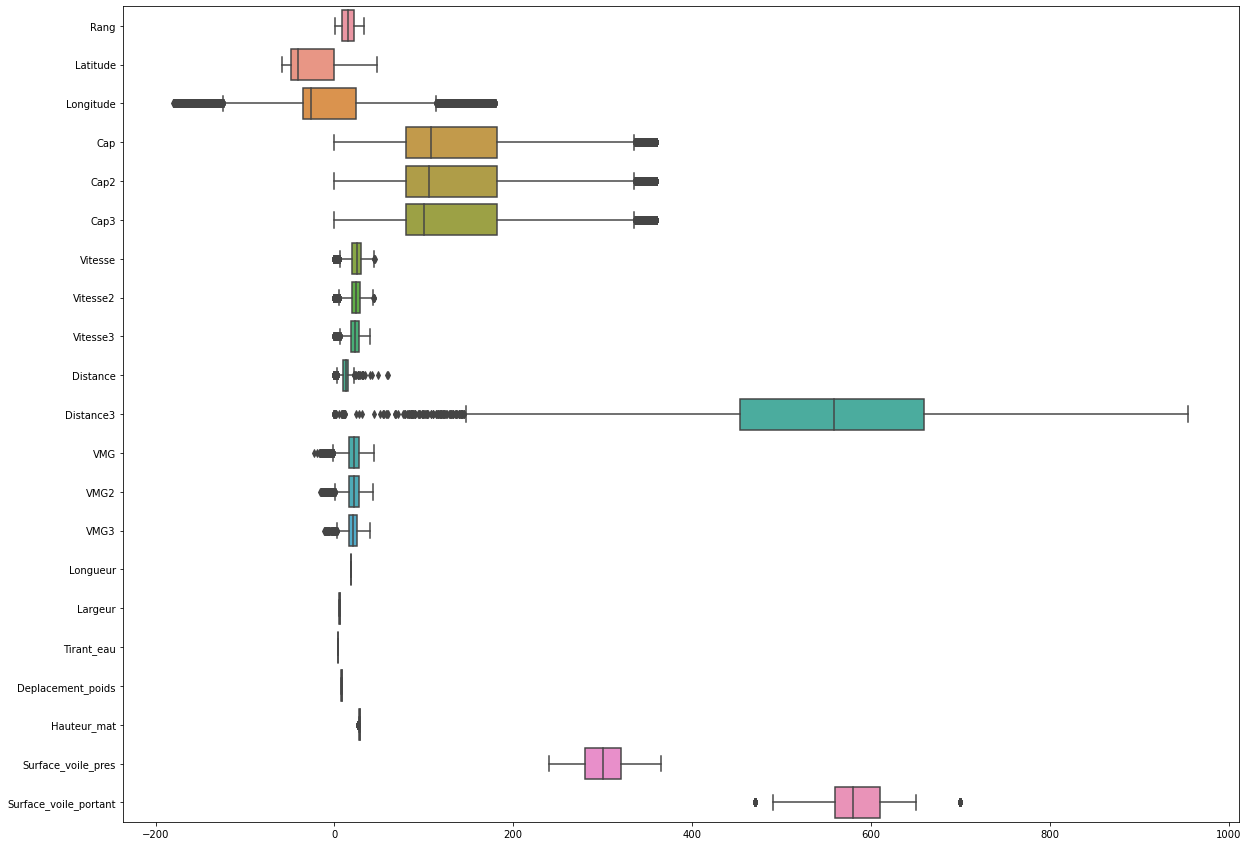

In [104]:
# Boxplot des variables quantitatives
plt.figure(figsize=(20, 15))
sns.boxplot(data=df3[['Rang','Latitude','Longitude','Cap','Cap2','Cap3','Vitesse','Vitesse2','Vitesse3','Distance',
                    'Distance3','VMG','VMG2','VMG3','Longueur','Largeur','Tirant_eau',
                      'Deplacement_poids','Hauteur_mat','Surface_voile_pres','Surface_voile_portant']], orient='h')

<AxesSubplot:>

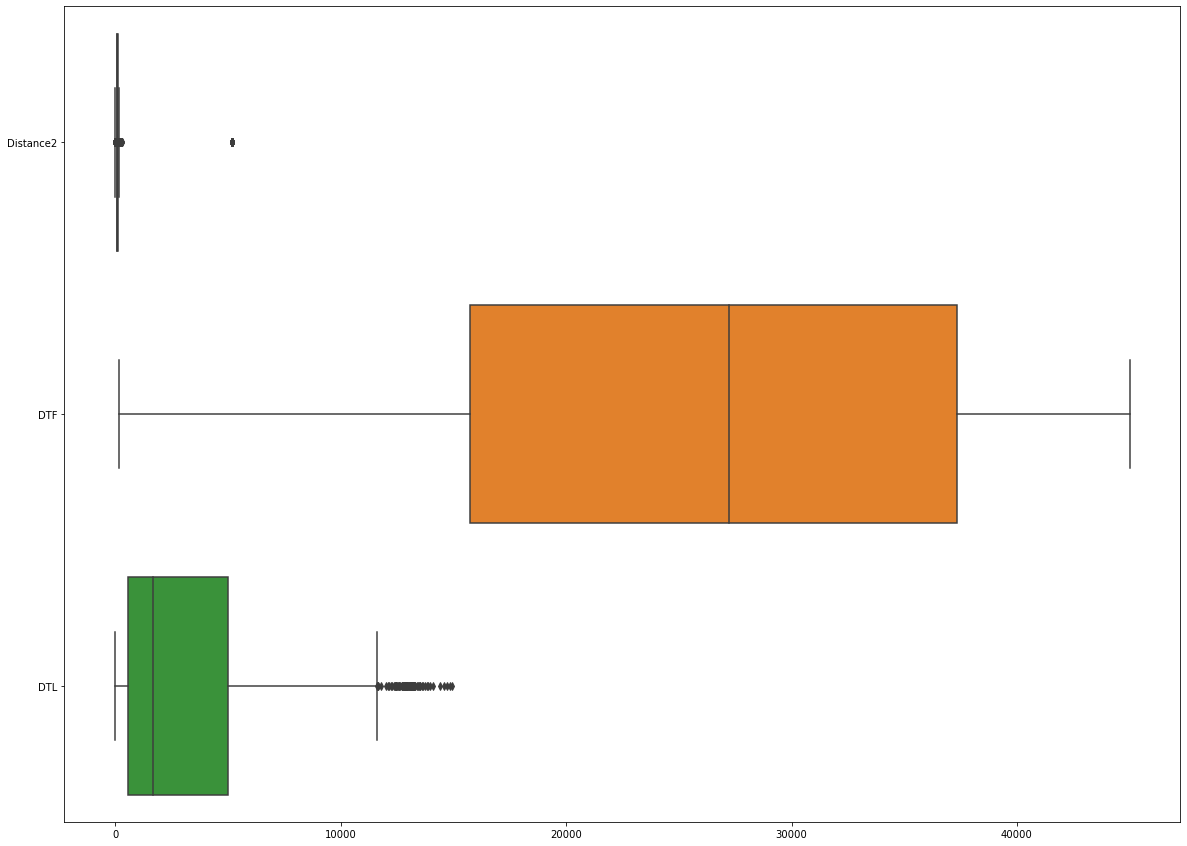

In [106]:
# Boxplot des variables quantitatives
plt.figure(figsize=(20, 15))
sns.boxplot(data=df3[['Distance2','DTF','DTL']], orient='h')

En regardant le tableau des statistiques descriptives et les 2 derniers boxplots des distributions des variables quantitatives on remarque clairement les différences d'échelles que présentent ces différentes variables. 

Nous prendront ce détail en considération dans la partie modélisation par la suite.

#### 3.1.1 Analyse uni-variée des variables qualitatives

In [309]:
# Nombre de nationalités différentes 
df3[["Nationalite","Skipper"]].nunique()

Nationalite     8
Skipper        33
dtype: int64

In [319]:
# Liste des nationalités représentées
df3[["Nationalite"]][63:96].value_counts()

Nationalite
FRA            25
GBR             2
ESP             1
FIN             1
ITA             1
JPN             1
MON             1
SUI             1
dtype: int64

Dans cette édition du Vendée Globe 2020 un total de 8 nationalités sont représentées, parmi lesquelles une majorité de francais (25) suivi de 2 britaniques, puis un représentant du Japon, de la Finlande, de l'Italie, de la Suisse, de l'Espagne, et de Monaco.

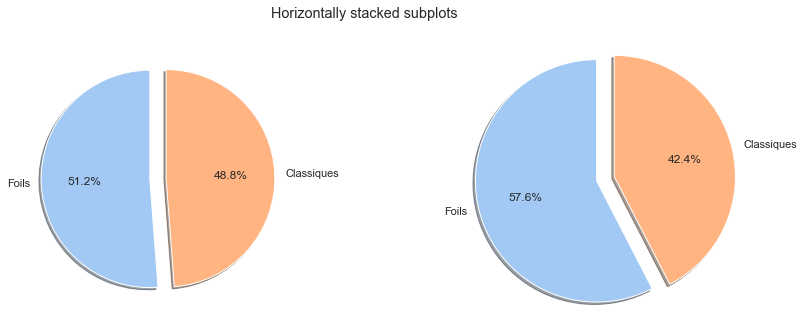

Parmi l'ensemble du dataframe :                      Parmi les 33 skippers : 
Nombre total de foils : 6983                         Nombre de voiliers avec foils : 19
Nombre total sans foils : 6655                       Nombre de voiliers sans foils : 14


In [286]:
# Diagramme des proportions des types de dérives sur l'ensemble du dataframe
name = ['Foils', 'Classiques']
data = [df3[df3["Type_derives"]=="foils"].count()[0], df3[df3["Type_derives"]=="classiques"].count()[0]]
data2 = [df2[df2["Type_derives"]=="foils"].count()[0], df2[df2["Type_derives"]=="classiques"].count()[0]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Horizontally stacked subplots')
explode=(0, 0.15)
ax1.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True) # plt.pie
ax2.pie(data2, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

print("Parmi l'ensemble du dataframe : " + "                     " + "Parmi les 33 skippers : " + "\n" + 
      "Nombre total de foils : " + str(df3[df3["Type_derives"]=="foils"].count()[0]) + "                         " + "Nombre de voiliers avec foils : " +
      str(df2[df2["Type_derives"]=="foils"].count()[0]) +
      "\n" + "Nombre total sans foils : " + str(df3[df3["Type_derives"]=="classiques"].count()[0]) + "                       " +
        "Nombre de voiliers sans foils : " + str(df2[df2["Type_derives"]=="classiques"].count()[0]))

Parmi les 33 skippers participants au Vendée Globe, 19 d'entre eux possèdent des voiliers équipés de foils et 14 n'en n'ont pas.

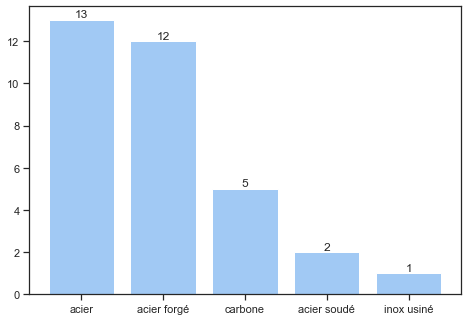

In [356]:
# Bar chart des différents voiles de quilles
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['acier', 'acier forgé', 'carbone', 'acier soudé', 'inox usiné']
values = df3[["Voile_quille"]][63:96].value_counts()
plot = ax.bar(label,values)
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
plt.show()

Sur les 33 voiliers, nous avons 13 voiles de quilles qui sont principalement composées d'acier, 12 voiles de quilles sont composées principalement d'acier fogé, 5 autres sont principalement composés de fibre de carbone, 2 voiles de quilles sont composées d'acier soudé, et enfin un voile de quille qui est principalement composé d'inox usiné.

In [385]:
# Architectes
df3[["Architecte"]][63:96].value_counts()

Architecte                      
VPLP/Verdier                        10
Bruce Farr Design                    3
Groupe Finot-Conq                    3
Owen Clarke Design                   3
Bruce Farr design                    2
Juan Kouyoumdjian                    2
VPLP                                 2
Verdier                              2
Lavanos                              1
Marc Lombard                         1
Owen Clarke Design - Clay Oliver     1
Pierre Rolland                       1
Samuel Manuard                       1
VPLP - Alex Thomson Racing           1
dtype: int64

Nous avons un total de 12 sociétés qui sont les architectes de ces différents voiliers, parmis lesquels l'association entre les groupes VPLP et Verdier est à l'origine des plans de construction de 10 des 33 voiliers, soit 30% du total ce qui est une proportion très importante, puisque les deuxièmes architectes en nombre de voiliers sont les groupes Bruce Farr Design, Groupe Finot-Conq et Owen Clarke Design, qui ne comptablisent chacun "que" 3 voiliers à leurs actifs. Par ailleurs, en dehors de leur collabortion les groupes VPLP et Verdier sont également impliqués de façon individuel dans la conception de 2 autres voiliers chacun, ce qui porte à 14 le nombre de voiliers totales qui ont étés conçut par les 2 groupes, ce qui représente plus de 42% du total des voiliers : proportion qui semble traduire une forte notoriété de la part de ces 2 groupes dans le marché d'architecture des voiliers de compétition.

### 3.2 Analyse bi-variée et multivariée

#### 3.2.1  Matrice des corélations 

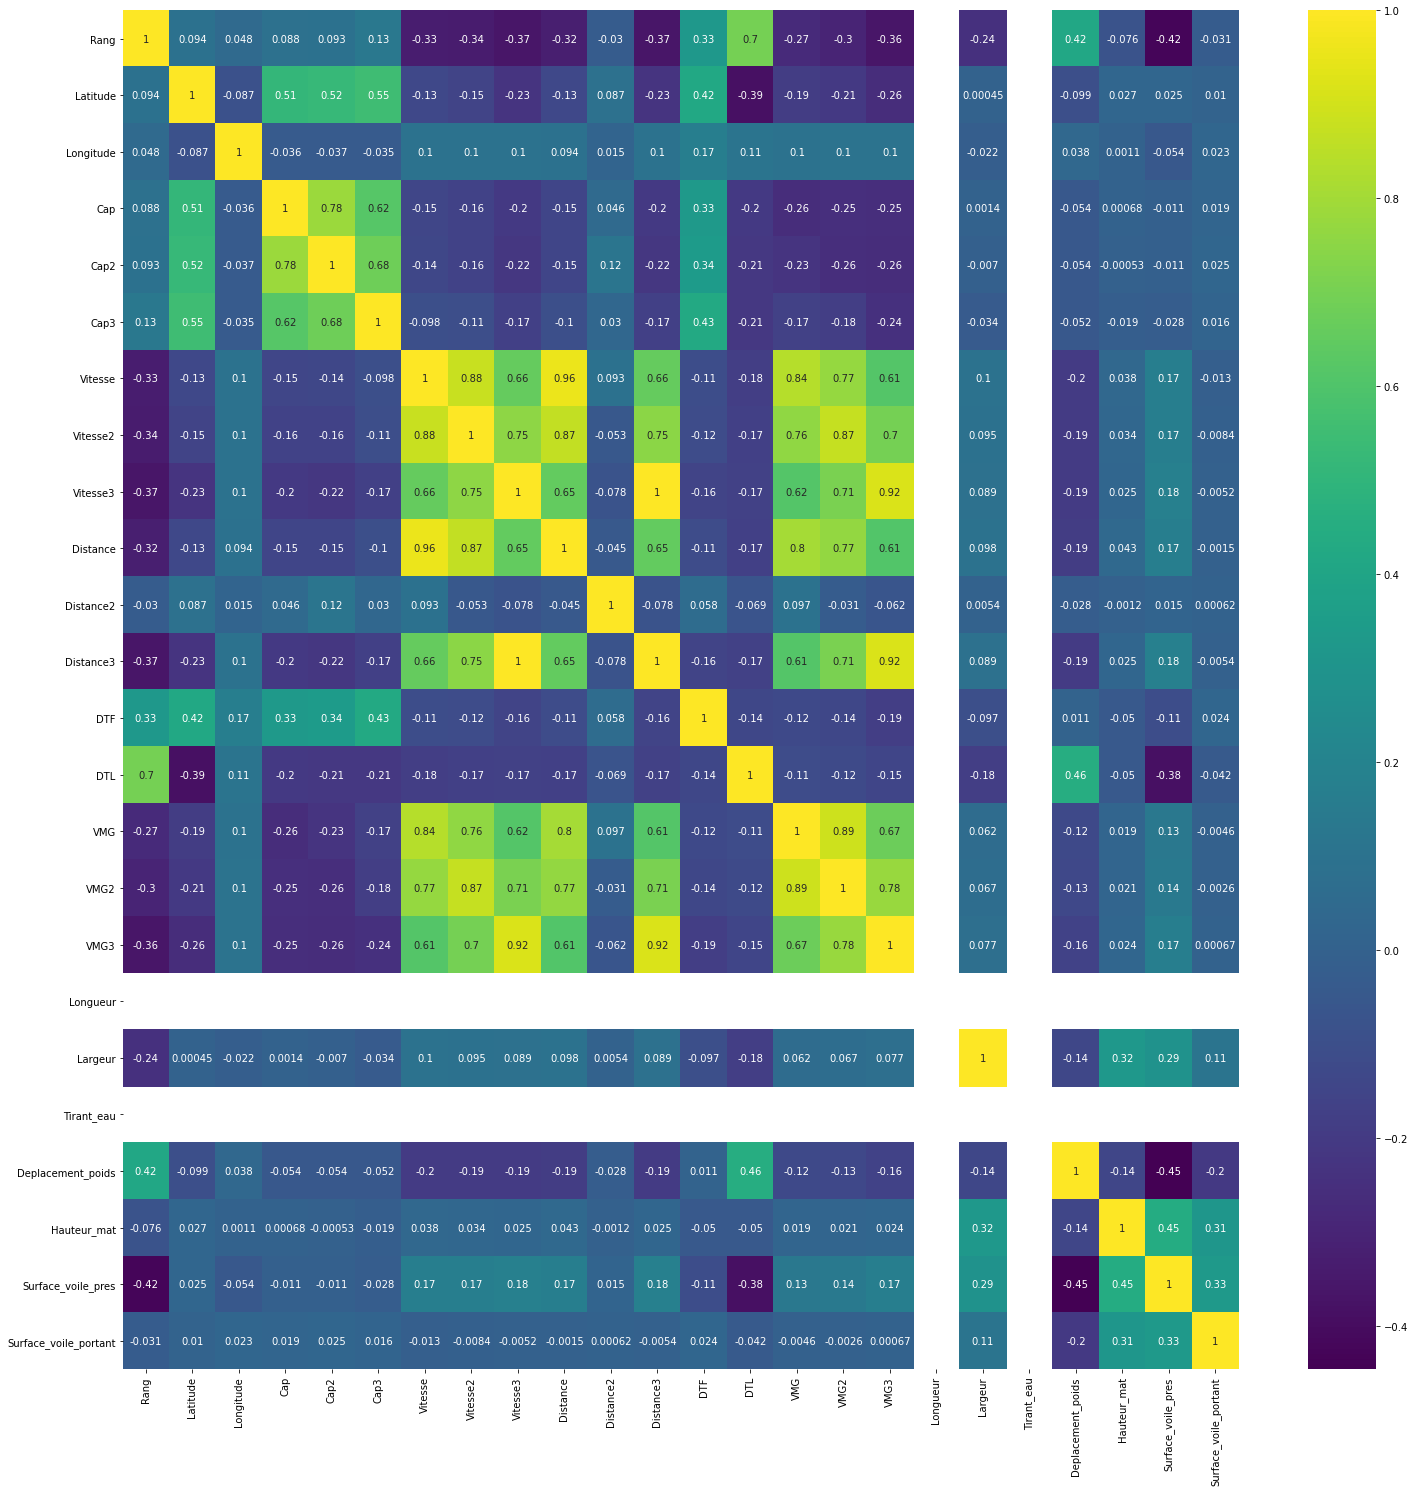

In [109]:
#Visualisation de la corrélation entre les variables 
data = df3[['Rang','Latitude','Longitude','Cap','Cap2','Cap3','Vitesse','Vitesse2','Vitesse3','Distance','Distance2',
                    'Distance3','DTF','DTL','VMG','VMG2','VMG3','Longueur','Largeur','Tirant_eau',
                      'Deplacement_poids','Hauteur_mat','Surface_voile_pres','Surface_voile_portant']]   

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))

# Heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="viridis")

#### 3.2.2 Analyse de la corélation entre le Rang et la vitesse utile des voiliers (VMG) 

<AxesSubplot:xlabel='Rang', ylabel='VMG'>

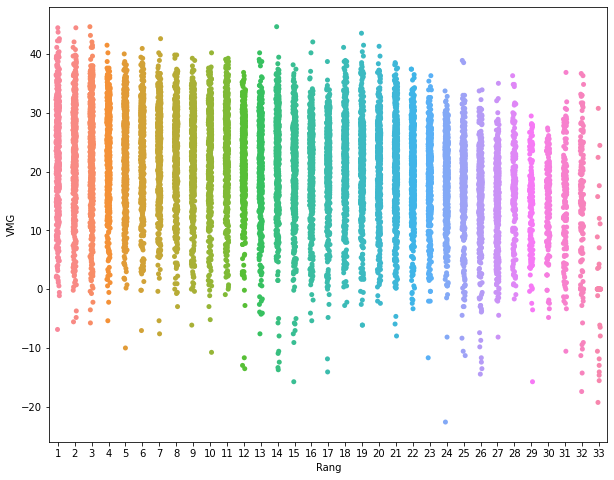

In [114]:
#Corrélation entre Rang et VMG
plt.figure(figsize=(10,8))
sns.stripplot (x="Rang",
              y="VMG",
              data=df3)

Afin de mieux analyser des eventuelles corrélations entre ces 2 variables, nous réalisons une régression linéaire. Notre but est de modéliser le Rang d'un voilier en fonction de sa vitesse utile (VMG).

In [125]:
from sklearn.linear_model import LinearRegression

x = df3[['VMG']]
y = df3[['Rang']]

reg = LinearRegression().fit(x, y)
R2 = reg.score(x,y)

print(R2)

0.07538861417869724


In [126]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
reg2 = model.fit(x, y)
R3 = reg2.score(x,y)

print(R3)

/Users/andressoto/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.045461211321308106


/Users/andressoto/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


L'analyse graphique du croisement de ces 2 variables ne permet de conclure à une quelconque corrélation. De plus, les applications d'un modèle de régression linéaire et logistique sont très mitigés puisque qu'ils n'explique respectivement que 7% et 4% des variations des données. Finalement, le coefficient de corrélation calculé précédemment permet de mieux comprendre les résultats obtenues puisque ce coefficient est négatif (-0.27). Il n'y a donc à première vue aucune corrélation entre les variables Rang et VMG.

#### 3.2.3 Analyse de l'impact de la présence d'un foil sur le classement et la vitesse d'un voilier

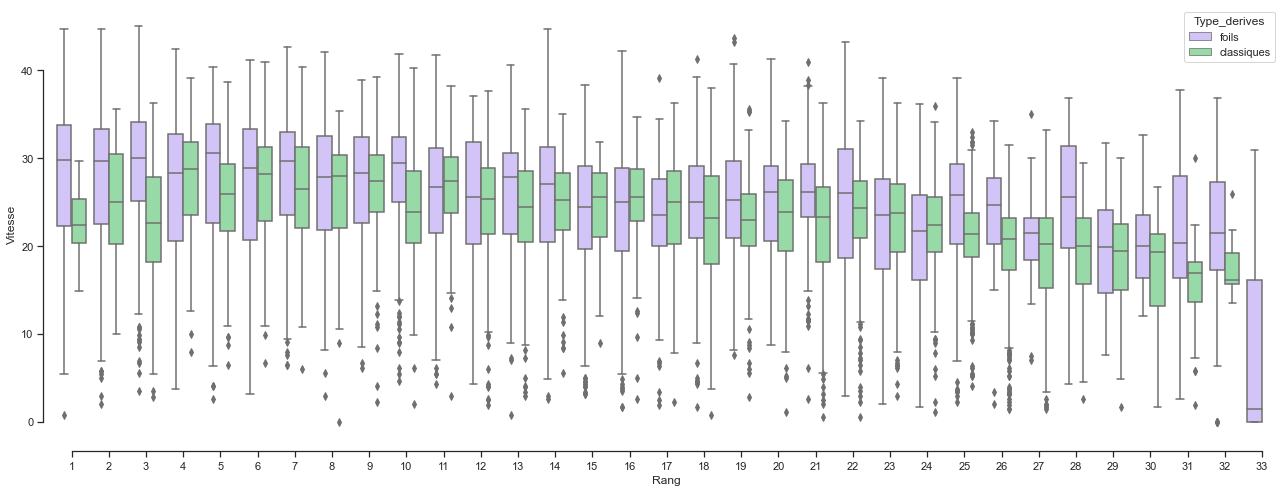

In [132]:
# multiple boxplots
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(22,8))
sns.boxplot(x="Rang", y="Vitesse",
            hue="Type_derives", palette=["m", "g"],
            data=df3)
sns.despine(offset=10, trim=True)

In [144]:
# moyennes de vitesse par rang et par types de dérives
print(df3.groupby(["Rang", "Type_derives"])["Vitesse"].mean())
print("\n" + "Vitesse moyenne (foils) : " + str(round(df3[df3["Type_derives"] == "foils"]["Vitesse"].mean(),2)) + "\n" +
    "Vitesse moyenne (classique) : " + str(round(df3[df3["Type_derives"] == "classiques"]["Vitesse"].mean(),2)))

Rang  Type_derives
1     classiques      22.924539
      foils           28.067729
2     classiques      24.962314
      foils           27.839196
3     classiques      22.345281
                        ...    
31    classiques      15.931140
      foils           20.934523
32    classiques      17.507573
      foils           21.490982
33    foils            8.124643
Name: Vitesse, Length: 65, dtype: float64

Vitesse moyenne (foils) : 25.72
Vitesse moyenne (classique) : 23.06


Dans la figure précédente nous avons représenté graphiquement les relations entre le rang, la vitesse et le type de dérive des voiliers. Nous constatons graphiquement que les voiliers qui ont des foils présentent globalement des  moyennes de vitesses et des rangs plus élevés que les voiliers qui ont des dérives classiques.

Nous désirons vérifier ce constat graphique à l'aide d'un test statistique.

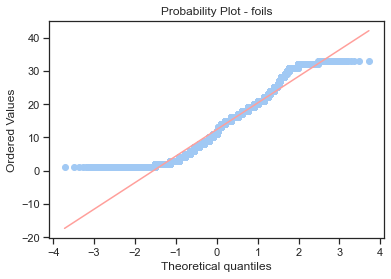

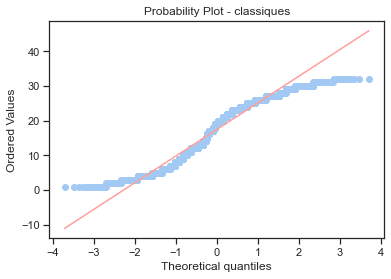

In [163]:
# vérification de l'hypothèse de normalité
import scipy.stats as stats

derives = data['Type_derives'].unique()
for i in derives:
    stats.probplot(data[data['Type_derives'] == i]['Rang'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  i)
    plt.show()

## 3. Classification

Dans cette section l'objectif est d'appliquer des méthodes de classification sur un sous ensemble de données de notre dataframe afin d'analyser les corrélations entre les variables et comprendre ce qui détermine le rang final d'un skipper.

### 3.1 Application de méthodes de classification

In [469]:
# Transformation de la variable Type_derives en variable binaire
df3["Type_derives"][df3["Type_derives"] == "foils"] = 1
df3["Type_derives"][df3["Type_derives"] == "classiques"] = 0

<ipython-input-469-779c05721b8c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-469-779c05721b8c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [486]:
# Choix des variables pour la classification
df5 = df3[["Rang","Vitesse","Largeur","Tirant_eau","Deplacement_poids","Hauteur_mat","Type_derives","Surface_voile_pres"]]

/Users/andressoto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/andressoto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



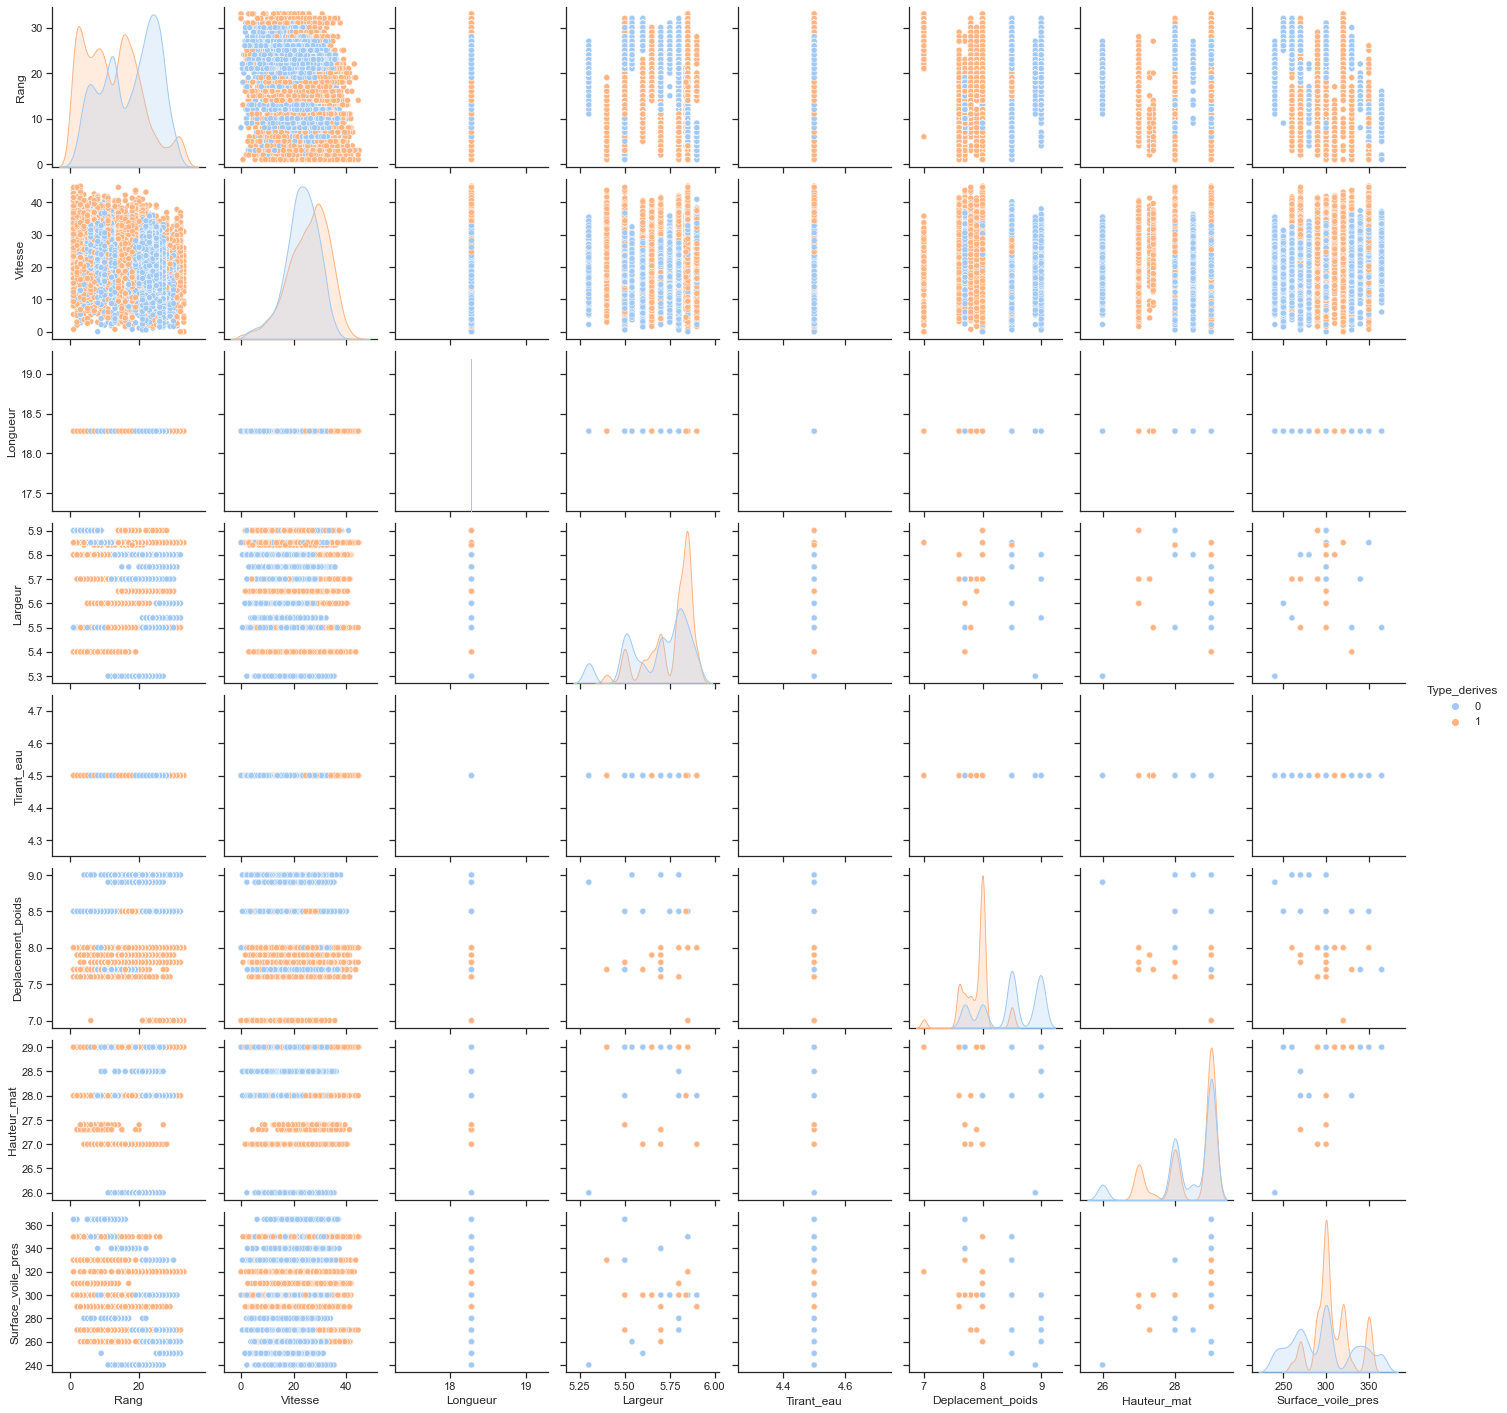

In [481]:
sns.pairplot(df5, hue="Type_derives")

#### 3.1.1 Création d'une base d'apprentissage et d'une base test

In [487]:
# Création d'une base test et apprentissage
from sklearn.model_selection import train_test_split
train, test = train_test_split(df5, test_size=0.2, stratify = df5['Rang'], random_state=42)

print(train.shape)
print(test.shape)

(10910, 8)
(2728, 8)


In [488]:
X_train = train.drop(['Rang'],axis = 1 ) 
X_test = test.drop(['Rang'],axis = 1 ) 

y_train = train['Rang'].values
y_test = test['Rang'].values

#### 3.1.2 Normalisation des données

In [489]:
# On recentre les données afin qu'elles aient le même poids 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#scaler.fit(X_train)

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

#### 3.1.3 Régression logistique

In [490]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.11
Accuracy of Logistic regression classifier on test set: 0.11


/Users/andressoto/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#### 3.1.4 Arbre de décision

In [491]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.55
Accuracy of Decision Tree classifier on test set: 0.25


#### 3.1.5 Méthode des Kmeans

In [482]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.44
Accuracy of K-NN classifier on test set: 0.26


#### 3.1.6 Gaussian Naive Bayes

In [484]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.20
Accuracy of GNB classifier on test set: 0.20


### 3.2 Conclusion

Cette approche de classification n'est pas concluante au vue des résultats des accuracy.

## 4. Distances et Mapping

### 4.1 Visualisation des distances totales parcourues par skippers

Afin de calculer les distances totales parcourues par les skippers, nous avons choisi d'additionner la variable "Distance2" de chaque skippers car elle correspond à la distance parcourue depuis le dernier classement, et donc il s'agit là du moyen le plus simple de calculer la distance totale. Pour ce faire, nous sommes parti de la ligne correspondant à la première ligne du deuxième classement établit (ligne 31) car les valeurs de Distance2 du premier classement ne correspondent pas aux données de la course dont il est ici question.

In [460]:
# data pour calculer les distances totales par skippers
distance = df3[["Skipper","Distance2"]][31:]
distance

,Skipper,Distance2
31,Jérémie Beyou,65.9312
32,Charlie Dalin,64.8200
33,Thomas Ruyant,66.3016
34,Alex Thomson,60.9308
35,Boris Herrmann,62.9680
...,...,...
13633,Manuel Cousin,76.1172
13634,Miranda Merron,65.7460
13635,Clément Giraud,56.1156
13636,Alexia Barrier,50.5596


##### Classement des distances totales parcourues

In [464]:
# classement distances totales
distance2 = df3.groupby(['Skipper'])['Distance2'].agg('sum')
distance2.sort_values(ascending=False)

Skipper
Thomas Ruyant           56763.4296
Louis Burton            56413.2164
Boris Herrmann          56023.1852
Yannick Bestaven        56010.0360
Giancarlo Pedote        55491.1056
Benjamin Dutreux        54428.4280
Damien Seguin           54346.0140
Jean Le Cam             54191.3720
Armel Tripon            54150.0724
Maxime Sorel            53116.6564
Jérémie Beyou           53001.2768
Charlie Dalin           51929.5244
Clarisse Cremer         51578.9408
Romain Attanasio        49951.0328
Kojiro Shiraishi        49326.7236
Stéphane Le Diraison    48908.9124
Arnaud Boissieres       48795.9404
Alan Roura              48771.3088
Didac Costa             47926.6116
Pip Hare                47536.9508
Manuel Cousin           47403.9772
Clément Giraud          46180.3608
Miranda Merron          45615.3156
Ari Huusela             43638.1204
Isabelle Joschke        43378.8404
Alexia Barrier          42527.2908
Sébastien Destremau     34256.0736
Sébastien Simon         21089.8352
Samantha Dav

##### Tableau des distances parcourues et du classement final

$$
\begin{array}{|l|c|c|c|c|}
\hline \text { Skipper } & \text { Distance totale réalisée (km) } & \text { Distance de la course (km) } & \text { Classement final } \\
\hline \text { Thomas Ruyant } & 56763,43 & 45177,68 & 6 \\
\hline \text { Louis Burton } & 56413,21 & 45177,68 & 3 \\
\hline \text { Boris Herrmann } & 56023,18 & 45177,68 & 5 \\
\hline \text { Yannick Bestaven } & 56010,03 & 45177,68 & 1 \\
\hline \text { Giancarlo Pedote } & 55491,1 & 45177,68 & 8 \\
\hline \text { Benjamin Dutreux } & 54428,42 & 45177,68 & 9 \\
\hline \text { Damien Seguin } & 54346,01 & 45177,68 & 7 \\
\hline \text { Jean Le Cam  } & 54191,37 & 45177,68 & 4 \\
\hline \text { Armel Tripon } & 54150,07 & 45177,68 & 11 \\
\hline \text { Maxime Sorel } & 53116,65 & 45177,68 & 10 \\
\hline \text { Jérémie Beyou } & 53001,27 & 45177,68 & 13 \\
\hline \text { Charlie Dalin } & 51929,52 & 45177,68 & 2 \\
\hline \text { Clarisse Cremer } & 51578,94 & 45177,68 & 12 \\
\hline \text { Romain Attanasio } & 49951,03 & 45177,68 & 14 \\
\hline \text { Kojiro Shiraishi } & 49326,72 & 45177,68 & 16 \\
\hline \text { Stéphane Le Diraison } & 48908,91 & 45177,68 & 18 \\
\hline \text { Arnaud Boissieres } & 48795,94 & 45177,68 & 15 \\
\hline \text { Alan Roura } & 48771,30 & 45177,68 & 17 \\
\hline \text { Didac Costa } & 47926,61 & 45177,68 & 20 \\
\hline \text { Pip Hare } & 47536,95 & 45177,68 & 19 \\
\hline \text { Manuel Cousin } & 47403,97 & 45177,68 & 23 \\
\hline \text { Clément Giraud } & 46180,36 & 45177,68 & 21 \\
\hline \text { Miranda Merron } & 45615,31 & 45177,68 & 22 \\
\hline \text { Ari Huusela } & 43638,12 & 45177,68 & 25 \\
\hline \text { Isabelle Joschke } & 43378,84 & 45177,68 & { Disqualifié } \\
\hline \text { Alexia Barrier } & 42527,29 & 45177,68 & 24 \\
\hline \text { Sébastien Destremau } & 34256,07 & 45177,68 & { Disqualifié } \\
\hline \text { Sébastien Simon } & 21089,83 & 45177,68 & { Disqualifié } \\
\hline \text { Samantha Davies } & 21031,86 & 45177,68 & { Disqualifié } \\
\hline \text { Fabrice Amedeo } & 20615,90 & 45177,68 & { Disqualifié } \\
\hline \text { Alex Thomson } & 20425,15 & 45177,68 & { Disqualifié } \\
\hline \text { Kevin Escoffier } & 19195,98 & 45177,68 & { Disqualifié } \\
\hline \text { Nicolas Troussel } & 9707,62 & 45177,68 & { Disqualifié } \\
\hline
\end{array}
$$

Ce tableau présente les distances totales parcourues par les skippers durant l'ensemble de la course, on a d'un côté les skippers qui ont réussit à atteindre la ligne d'arriver, et de l'autre côté les skippers qui n'ont pas pu finir la course pour cause d'abandon. Il permet de mettre en évidence les skippers qui ont su le plus optimiser leurs distances de parcours tout au long de la course. Ainsi, nous remarquons que le vainqueur de l'édition du VendéeGlobe 2020 arrive en 4ème position des skippers qui ont parcourues les plus longues distances. Un détail attire plus particulièrement notre attention, en effet, le vice-champion (2ème) de l'édition n'est que le 12ème participant en terme de distances parcourues, ce qui laisse témoigner d'une grande habilité et technique dans le commandement du voilier.

### 4.2 Mapping des parcours des 3 premiers du VendéeGlobe 2020

In [454]:
# dataframe des 3 premiers du classement final du Vendée Globe 2020
df9 = df3[df3["Skipper"] == "Yannick Bestaven"]
df10 = df3[df3["Skipper"] == "Charlie Dalin"]
df11 = df3[df3["Skipper"] == "Louis Burton"]

In [453]:
import plotly.graph_objects as go
import pandas as pd

scl = ['rgb(213,62,79)', 'rgb(244,109,67)', 'rgb(253,174,97)', \
    'rgb(254,224,139)', 'rgb(255,255,191)', 'rgb(230,245,152)', \
    'rgb(171,221,164)', 'rgb(102,194,165)', 'rgb(50,136,189)'
]
n_colors = len(scl)

fig = go.Figure()

for i, (lat, lon) in enumerate(zip(df9.columns[2:3], df9.columns[3:4])):
    fig.add_trace(go.Scattergeo(
        lon = df9["Longitude"],
        lat = df9["Latitude"],
        mode = 'lines',
        line = dict(width = 2, color = scl[0]
        ), name = 'Yannick Bestaven (1er)'))

for i, (lat, lon) in enumerate(zip(df10.columns[2:3], df10.columns[3:4])):
    fig.add_trace(go.Scattergeo(
        lon = df10["Longitude"],
        lat = df10["Latitude"],
        mode = 'lines',
        line = dict(width = 2, color = scl[8]
        ), name = 'Charlie Dalin (2ème)'))
    
for i, (lat, lon) in enumerate(zip(df11.columns[2:3], df11.columns[3:4])):
    fig.add_trace(go.Scattergeo(
        lon = df11["Longitude"],
        lat = df11["Latitude"],
        mode = 'lines',
        line = dict(width = 2, color = scl[2]
        ), name = 'Louis Burton (3ème)'))
    
fig.update_layout(
    title_text = 'Contour lines over globe<br>(Click and drag to rotate)',
    showlegend = True,
    geo = dict(
        showland = True,
        showcountries = True,
        showocean = True,
        countrywidth = 0.5,
        landcolor = 'rgb(192, 192, 192)',
        lakecolor = 'rgb(255,255,255)',
        oceancolor = 'rgb(255,255,255)',
        projection = dict(
            type = 'orthographic',
            rotation = dict(
                lon = -100,
                lat = 40,
                roll = 0
            )
        ),
        lonaxis = dict(
            showgrid = True,
            gridcolor = 'rgb(102, 102, 102)',
            gridwidth = 0.5
        ),
        lataxis = dict(
            showgrid = True,
            gridcolor = 'rgb(102, 102, 102)',
            gridwidth = 0.5
        )
    )
)



fig.show()

Ce mapping est très intéressant car il permet de visualiser l'itinéraire totale des 3 premiers skippers, et notamment il permet  d'apercevoir la façon dont le 2ème skipper (Charlie Dalin) a clairement mieux optimisé la distance de son parcours par rapport aux 2 autres skippers.